In [1]:
import torch
import os

import utils

## Data Preparation

In [2]:
# path of img data
pth_train = 'Data/ISIC2017/ISIC-2017-Aug_Training_Data'


ann_train = 'Data/ISIC2017/ISIC-2017_Training_Aug_Part3_GroundTruth.csv'

In [3]:
ann_train = utils.Annotation(ann_train)

In [4]:
from torchvision import transforms
from torch.utils import data

transform = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],
                                                     [0.229, 0.224, 0.225])
                                ])

# augmentation transform
transform_train = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomVerticalFlip(p=0.5),
                                      transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(
                                          224, scale=(0.4, 1), ratio=(3/4, 4/3)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])
                                      ])

In [7]:
# create train dataset
train_data = utils.Data(ann_train.df, pth_train, transform=transform)
train_loader = data.DataLoader(train_data, batch_size=6, shuffle=True, num_workers=2)
# train_loader = data.DataLoader(train_data, batch_size=50, shuffle=True, drop_last=True)

# # create validation dataset
# valid_data = utils.Data(ann_valid.df, pth_valid, transform=transform)
# valid_loader = data.DataLoader(valid_data, batch_size=200, shuffle=False, num_workers=2)

# # create test dataset
# test_data = utils.Data(ann_test.df, pth_test, transform=transform)
# test_loader = data.DataLoader(test_data, batch_size=200, shuffle=False, num_workers=2)
# # test_loader = data.DataLoader(test_data, batch_size=50, shuffle=False)

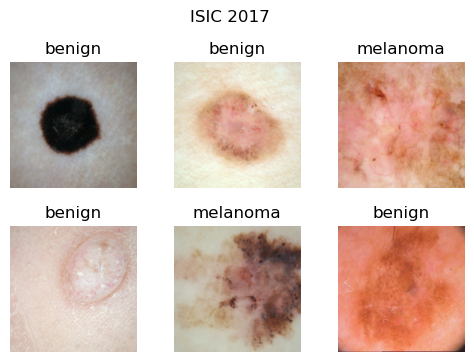

In [9]:
x, y = next(iter(train_loader))

labels = ann_train.to_names(y)

utils.show_samples(x, labels, 2, 3, "ISIC 2017")